<a href="https://colab.research.google.com/github/kjousselin/Datavizualisation/blob/main/Pr%C3%A9sentation_KPCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KPCA : Kernel PCA


Par  Kévin Jousselin et Meriem Bencheikh

KPCA ou "ACP à noyau" est une famille de méthodes utilisant un pré-traitement des données à l'aide d'une fonction noyau $k(x,y)$ avant d'appliquer une ACP.

Cette méthode s'applique bien sur des données qui ne sont pas linéairement séparables, mais dont la séparation s'effectue plutôt selon des cercles (voir exemples plus loin).



#### Explication :
- L'idée de base pour traiter des données linéairement inséparables est de les projeter sur un espace de dimension supérieure où elles deviennent linéairement séparables, nous pouvons, ensuite, appliquer l'ACP sur ce nouvel ensemble de données.
- Soit la fonction $x \longmapsto k( x_i, x_j )$, appelée la fonction noyau, le terme "noyau" décrit une fonction qui calcule le produit scalaire des images des échantillons $X$ sous $k$   
- la méthode KernelPCA peut être résumée en quelques étapes:

1 - On choisit d'abord une fonction noyau $k( x_i, x_j )$ et soit $T $ une transformation vers une dimension supérieure,\
2 - On construit la matrice du noyau $K$ à partir de l'ensemble de données d'entraînement $X$  : $ K= T( X ) T( X )^T$,

$K=
\begin{pmatrix}
 k(x_1,x_1) &  k(x_1,x_2) & ..... & k(x_1,x_d)\\
k(x_2,x_1) &  k(x_2,x_2) & ..... & k(x_2,x_d) \\
. &  . &  & .\\
. &  . &  & .\\
k(x_d,x_1) &  k(x_d,x_2) & ..... & k(x_d,x_d)
\end{pmatrix}
$


La taille de cette matrice évolue avec la taille des données. \
3 - On centre notre matrice $K$ de noyau (soustraire la moyenne des données transformées et diviser par les écarts-types),
$K' = K - 2(I)K + (I)K(I)$,\
4 - Ensuite, on calcule les vecteurs propres et les valeurs propres de cette matrice,\
5 - Nous choisirons le nombre de dimensions que nous voulons pour notre ensemble de données $"m"$ réduit. Ensuite, nous allons choisir nos premiers $m$ vecteurs propres correspondants aux plus grandes valeurs propres et les concaténer dans une matrice.  
Ces vecteurs propres sont les points de données déjà projetés sur les composantes principales respectives.


### Illustration de la KPCA avec le noyau gaussien RBF
Le noyau gaussien est donné par la formule suivante:
$$k(x, y) = exp(− γ ||-x − y||{_2^2} )$$ avec $ γ=1/2σ^2$ \





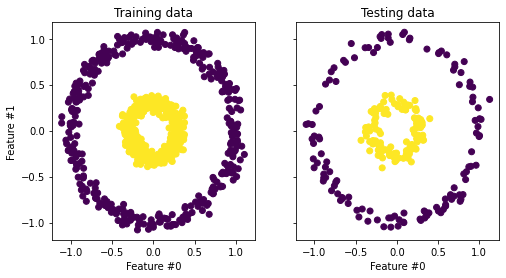

In [ ]:
# Un exemple à l'aide d'un jeu de données 'construits' :

from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

X, y = make_circles(n_samples=1_000, factor=0.3, noise=0.05, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

import matplotlib.pyplot as plt

_, (train_ax, test_ax) = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(8, 4))

train_ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
train_ax.set_ylabel("Feature #1")
train_ax.set_xlabel("Feature #0")
train_ax.set_title("Training data")

test_ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
test_ax.set_xlabel("Feature #0")
_ = test_ax.set_title("Testing data")


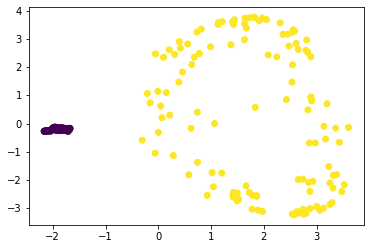

In [ ]:
# Construction 'à la main' de la méthode K-PCA sur l'exemple précédent

import numpy as np

# Fonction noyau 'rbf' (noyau gaussien)
def K_gauss(x, y, gamma = 10):
  return(np.exp(-np.linalg.norm(x-y)**2*gamma))

# Construction de la matrice du noyau
K = np.zeros((250,250))
for i in range(250):
  for j in range(250):
    K[i,j]= K_gauss(X_test[i,:],X_test[j,:])

# Application de l'ACP sur la matrice K
pca=PCA(n_components=2)
RESULT = pca.fit(K).transform(K)

# Affichage du resultat obtenu
plt.scatter(RESULT[:,0], RESULT[:,1], c= y_test)


## Utilisation de KPCA de sklearn et comparaison avec l'ACP

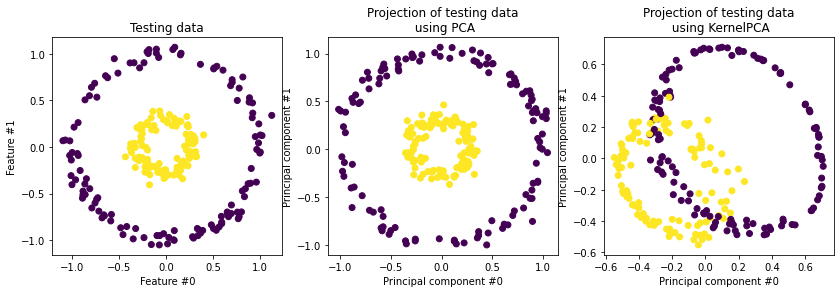

In [ ]:
from sklearn.decomposition import PCA, KernelPCA

pca = PCA(n_components=2)
kernel_pca = KernelPCA(
    n_components=None, kernel="rbf", gamma=1.4, fit_inverse_transform=True, alpha=0.1
)

X_test_pca = pca.fit(X_train).transform(X_test)
X_test_kernel_pca = kernel_pca.fit(X_train).transform(X_test)

fig, (orig_data_ax, pca_proj_ax, kernel_pca_proj_ax) = plt.subplots(
    ncols=3, figsize=(14, 4)
)

orig_data_ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
orig_data_ax.set_ylabel("Feature #1")
orig_data_ax.set_xlabel("Feature #0")
orig_data_ax.set_title("Testing data")

pca_proj_ax.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test)
pca_proj_ax.set_ylabel("Principal component #1")
pca_proj_ax.set_xlabel("Principal component #0")
pca_proj_ax.set_title("Projection of testing data\n using PCA")

kernel_pca_proj_ax.scatter(X_test_kernel_pca[:, 0], X_test_kernel_pca[:, 1], c=y_test)
kernel_pca_proj_ax.set_ylabel("Principal component #1")
kernel_pca_proj_ax.set_xlabel("Principal component #0")
_ = kernel_pca_proj_ax.set_title("Projection of testing data\n using KernelPCA")



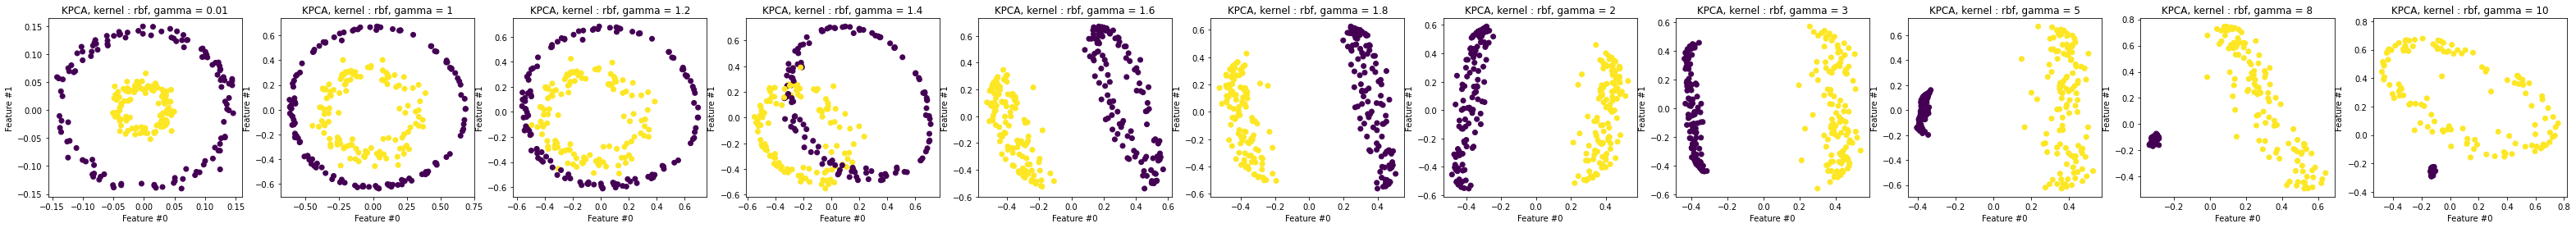

In [ ]:

Gammas = [0.01,1,1.2,1.4,1.6,1.8,2,3,5,8,10]

N = len(Gammas)

# Construction des KPCA pour gamma dans la liste
KPCA = []
X_test_kernel_pca = []

for gamma in Gammas:
  kernel_pca_gamma = KernelPCA(
      n_components=None, kernel="rbf", gamma=gamma, fit_inverse_transform=True, alpha=0.1
  )

  KPCA.append(kernel_pca_gamma)

  X_test_kernel_pca.append(kernel_pca_gamma.fit(X_train).transform(X_test))


fig, axs = plt.subplots(
    ncols=N, figsize=(N*5, 4)
)

for k in range(N):
  axs[k].scatter(X_test_kernel_pca[k][:, 0], X_test_kernel_pca[k][:, 1], c=y_test)
  axs[k].set_ylabel("Feature #1")
  axs[k].set_xlabel("Feature #0")
  axs[k].set_title(f"KPCA, kernel : {KPCA[k].kernel}, gamma = {KPCA[k].gamma}")

plt.axis("equal")
plt.show()

## Test d'autres noyaux

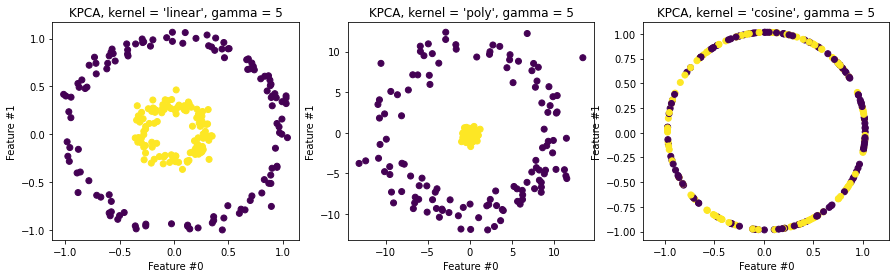

In [ ]:
Kernels = ['linear', 'poly', 'cosine']

# Construction des KPCA pour gamma dans la liste
KPCA = []
X_test_kernel_pca = []

for kernel in Kernels:
  # gamma = 5 uniquement pour le noyau 'poly'
  kernel_pca = KernelPCA(
      n_components=None, kernel=kernel, gamma=5, fit_inverse_transform=True, alpha=0.1    
  )

  KPCA.append(kernel_pca)

  X_test_kernel_pca.append(kernel_pca.fit(X_train).transform(X_test))


fig, axs = plt.subplots(
    ncols=3, figsize=(15, 4)
)

for k in range(3):
  axs[k].scatter(X_test_kernel_pca[k][:, 0], X_test_kernel_pca[k][:, 1], c=y_test)
  axs[k].set_ylabel("Feature #1")
  axs[k].set_xlabel("Feature #0")
  axs[k].set_title(f"KPCA, kernel = '{KPCA[k].kernel}', gamma = {KPCA[k].gamma}")

plt.axis("equal")
plt.show()